In [2]:
#1.1
import pandas as pd 
cancer = pd.read_csv("cancer.csv")
cancer.head(9)

,ID,Class,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension
0,842302,M,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,842517,M,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,84300903,M,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,84348301,M,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,84358402,M,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
5,843786,M,-0.165353,-0.313560,-0.114908,-0.244105,2.046712,1.720103,1.262133,0.905091,1.752527,2.239831
6,844359,M,1.367780,0.322599,1.367122,1.274098,0.518184,0.021196,0.509104,1.195664,0.262245,-0.014718
7,84458202,M,0.163619,0.400695,0.099361,0.028834,1.446688,0.724148,-0.021035,0.623647,0.477221,1.724917
8,844981,M,-0.161215,0.822090,-0.031581,-0.248145,1.661295,1.816711,1.278909,1.390393,2.387756,1.287517


### 1.2
The variable area is not a classification problem because area is a continuous variable which uses more of an regression techniques. 

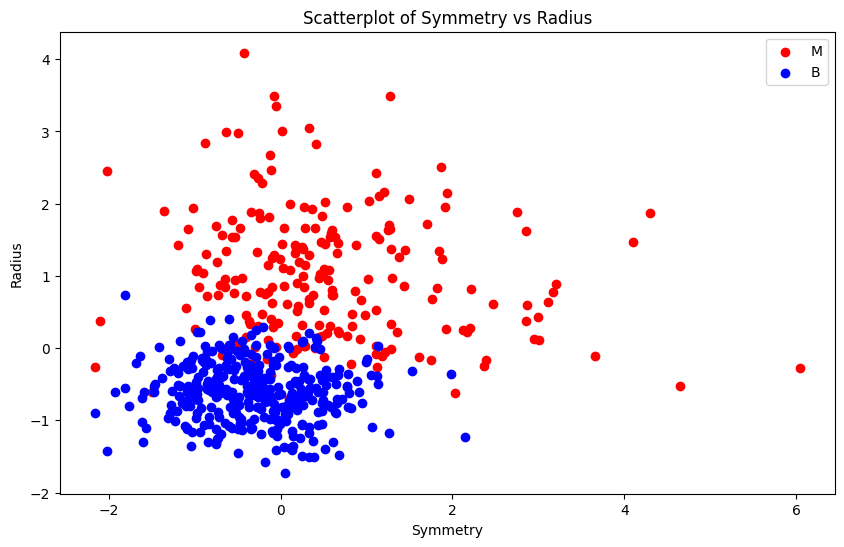

In [3]:
#1.3
import matplotlib.pyplot as plt

class_M = cancer[cancer['Class'] == 'M']
class_B = cancer[cancer['Class'] == 'B']

plt.figure(figsize=(10, 6))
plt.scatter(class_M['Symmetry'], class_M['Radius'], color='red', label='M')
plt.scatter(class_B['Symmetry'], class_B['Radius'], color='blue', label='B')

plt.xlabel('Symmetry')
plt.ylabel('Radius')
plt.title('Scatterplot of Symmetry vs Radius')

plt.legend()
plt.show()
#thank you chat

### 1.4
symmetry=1 and radius=1 is red circle which is malignant

In [4]:
#1.5
first_observation = cancer.iloc[0]
second_observation = cancer.iloc[1]

a_x = first_observation['Symmetry']
a_y = first_observation['Radius']
b_x = second_observation['Symmetry']
b_y = second_observation['Radius']

print("Symmetry value for the first row (a_x):", a_x)
print("Radius value for the first row (a_y):", a_y)
print("Symmetry value for the second row (b_x):", b_x)
print("Radius value for the second row (b_y):", b_y)

Symmetry value for the first row (a_x): 2.74820411421215
Radius value for the first row (a_y): 1.88503099661675
Symmetry value for the second row (b_x): -0.243675259026272
Radius value for the second row (b_y): 1.8043398096552


In [5]:
#1.6
import numpy as np

distance = np.sqrt((a_x - b_x)**2 + (a_y - b_y)**2)
distance

2.9929672987960956

In [6]:
#1.7
a_z = cancer.loc[0, 'Concavity']
b_z = cancer.loc[1, 'Concavity']
distance_concavity = np.sqrt((a_x - b_x)**2 + (a_y - b_y)**2 + (a_z - b_z)**2)
distance_concavity

3.7469567200527925

In [7]:
#1.8
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = cancer[['Symmetry', 'Radius', 'Concavity']]
y = cancer['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

knn_spec = KNeighborsClassifier(n_neighbors=7)
knn_spec.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [8]:
#1.9
from sklearn.metrics import classification_report

# Predicting on the test set
y_pred = knn_spec.predict(X_test)

# Generating classification report
report = classification_report(y_test, y_pred)

print(report)
#thanks chat

              precision    recall  f1-score   support

           B       0.97      0.92      0.95       117
           M       0.85      0.94      0.89        54

    accuracy                           0.93       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.93      0.93       171



In [9]:
1.10
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[108   9]
 [  3  51]]


Based on this confusion matrix, there is 9 FP which mean the model might be too aggresive in predicting positive outcomes. The other one is 3 FN which is a small number but in medical world it is concerning. This confusion matrix has slightly higher FP than FN. This means the model has hgiher recall but lower precision. 

In [11]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

k_values = [2, 7, 20]

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

for k in k_values:
    print(f"\n{k}-Fold Cross-Validation:")
    
    kf = KFold(n_splits=k, shuffle=True, random_state=4)
    
    for metric in scoring.keys():
        scores = cross_val_score(knn_spec, X, y, cv=kf, scoring=scoring[metric])
        avg_score = np.mean(scores)
        print(f"{metric.capitalize()}: {avg_score:.4f}")
#thanks chat


2-Fold Cross-Validation:
Accuracy: 0.9279
Precision: 0.9302
Recall: 0.9279
F1: 0.9280

7-Fold Cross-Validation:
Accuracy: 0.9331
Precision: 0.9360
Recall: 0.9331
F1: 0.9330

20-Fold Cross-Validation:
Accuracy: 0.9329
Precision: 0.9385
Recall: 0.9329
F1: 0.9329


### 2
There needs to be a trade-off between high precision and high recall. A precision is to measures the proportion of true positive predictions among all positive predictions made by the model, while a recall is to measures the proportion of true positive predictions among all actual positive instances in the dataset. So when we have a high precision model, it means that the recall will be lower and vice versa. 